In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
from pathlib import Path
image_dir = Path("/content/drive/MyDrive/pics")

In [3]:
test_images = []
for ext in ["*.jpg", "*.png", "*.jpeg", "*.JPG", "*.PNG", "*.JPEG"]:
    test_images.extend(image_dir.glob(ext))

test_images

[PosixPath('/content/drive/MyDrive/pics/IMG_5151.JPG'),
 PosixPath('/content/drive/MyDrive/pics/IMG_5153.JPG'),
 PosixPath('/content/drive/MyDrive/pics/IMG_5154.JPG'),
 PosixPath('/content/drive/MyDrive/pics/IMG_5152.PNG')]

In [14]:
!pip install easyocr
!pip install jiwer
import easyocr

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from jiwer import cer, wer

In [6]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [27]:
ground_truth = {
    "IMG_5151": "SPEED LIMIT 25 NO PARKING FRIDAY 12 30 PM TO 3 30 PM",
    "IMG_5153": "DREAM",
    "IMG_5154": "57",
    "IMG_5152": "This is a handwritten example Write as good as you can",
}

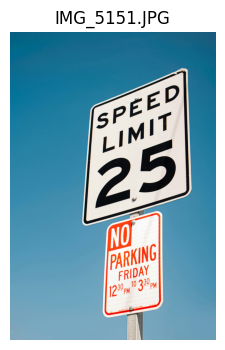

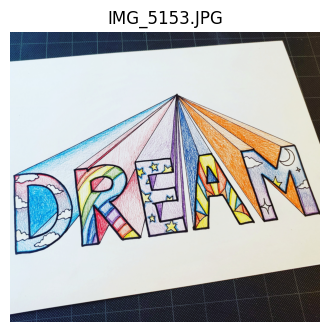

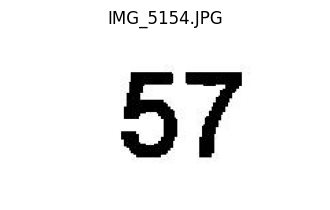

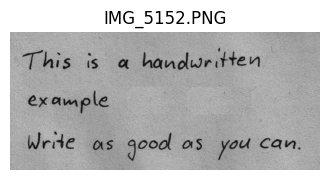

In [25]:
for img_path in test_images:
    img = cv2.imread(str(img_path))
    plt.figure(figsize=(4,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(img_path.name)
    plt.axis("off")

In [30]:
easyocr_results = []

total_cer = 0
total_wer = 0
count = 0

for img_path in test_images:
    key = img_path.stem.upper()

    if key not in ground_truth:
        print("Skipping (no GT):", img_path.name)
        continue

    img = cv2.imread(str(img_path))
    results = reader.readtext(img)

    pred_text = " ".join([res[1] for res in results])
    gt_text = ground_truth[key]

    c = cer(gt_text, pred_text)
    w = wer(gt_text, pred_text)

    total_cer += c
    total_wer += w
    count += 1

    easyocr_results.append({
        "image": img_path.name,
        "prediction": pred_text,
        "CER": c,
        "WER": w
    })

avg_cer = total_cer / count
avg_wer = total_wer / count

easyocr_results


[{'image': 'IMG_5151.JPG',
  'prediction': 'NO TO PM PM SPEED LIMIT 25 PARKING FRIDAY 380 1230 Vhunne RAn',
  'CER': 0.6153846153846154,
  'WER': 0.9230769230769231},
 {'image': 'IMG_5153.JPG', 'prediction': '', 'CER': 1.0, 'WER': 1.0},
 {'image': 'IMG_5154.JPG', 'prediction': '57', 'CER': 0.0, 'WER': 0.0},
 {'image': 'IMG_5152.PNG',
  'prediction': 'This is 1 handwr #ten ex Wrie Ms 0$ can. awple Jood You',
  'CER': 0.5,
  'WER': 1.0}]

Image: IMG_5151.JPG
EasyOCR Output:
NO TO PM PM SPEED LIMIT 25 PARKING FRIDAY 380 1230 Vhunne RAn
Image: IMG_5153.JPG
EasyOCR Output:

Image: IMG_5154.JPG
EasyOCR Output:
57
Image: IMG_5152.PNG
EasyOCR Output:
This is 1 handwr #ten ex Wrie Ms 0$ can. awple Jood You


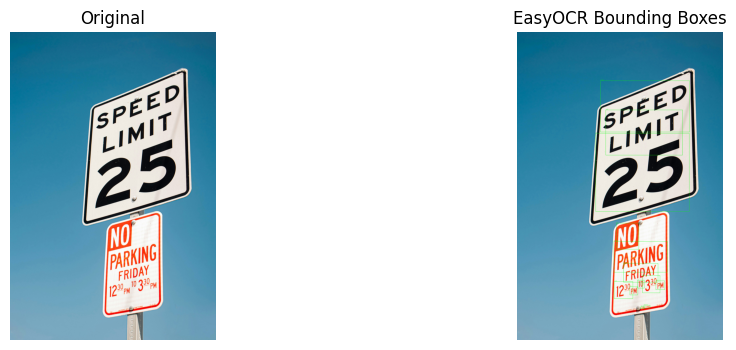

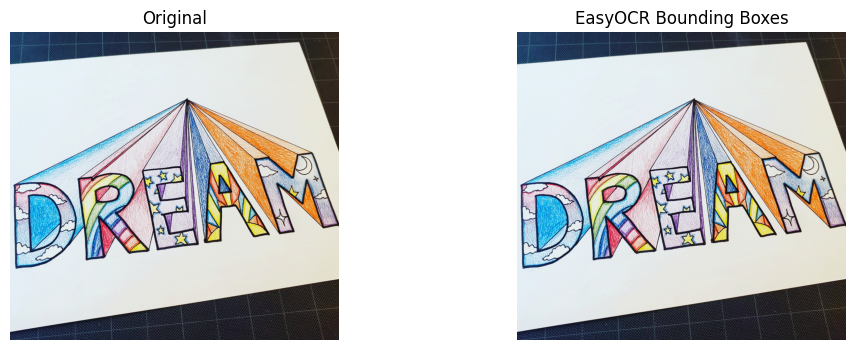

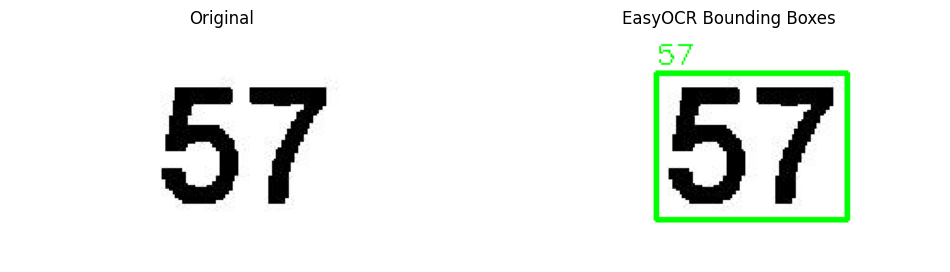

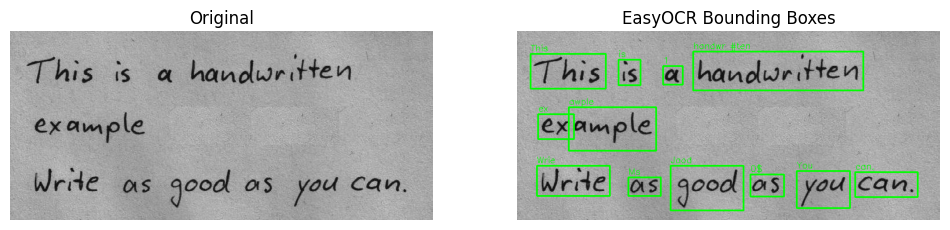

In [31]:
for img_path in test_images:
    img = cv2.imread(str(img_path))

    results = reader.readtext(img)

    img_box = img.copy()
    pred_text = " ".join([res[1] for res in results])

    for box, text, conf in results:
        x_coords = [int(pt[0]) for pt in box]
        y_coords = [int(pt[1]) for pt in box]

        x_min, y_min = min(x_coords), min(y_coords)
        x_max, y_max = max(x_coords), max(y_coords)

        cv2.rectangle(
            img_box,
            (x_min, y_min),
            (x_max, y_max),
            (0, 255, 0),
            2
        )

        cv2.putText(
            img_box,
            text,
            (x_min, y_min - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            1
        )

    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
    plt.title("EasyOCR Bounding Boxes")
    plt.axis("off")

    # ---- OCR text ----
    print("="*60)
    print("Image:", img_path.name)
    print("EasyOCR Output:")
    print(pred_text)


In [32]:
print("FINAL CER AND WER:-")
print("CER: ",avg_cer)
print("WER: ",avg_wer)

FINAL CER AND WER:-
CER:  0.5288461538461539
WER:  0.7307692307692308
